In [1]:
import pandas as pd

# Load the dataset
file_path = '/kaggle/input/filleddatamice/updated_dataset(97 feature).csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head()


,sarcopenia_2,Place,sex,Age,height_cm,weight_kg,SMM_kg,BFM_kg,BMI_kgm2,Percent_BF,...,PreFVC,FEV1,PEF,MIP_Ave,SAF,HbA1c,DM,Hypertension,Hyperlipidemia,Sleepdisorder
0,0,0,0,70,149.0,70.00,20.3,34.40,31.53,44.9,...,105,2.00,5.25,29.33,2.0,5.3,0,0,0,1
1,0,0,0,81,146.5,68.40,18.6,33.29,31.90,48.7,...,113,1.73,4.08,38.67,3.6,5.9,1,1,0,0
2,0,0,1,90,174.0,67.09,24.6,21.40,22.20,31.9,...,75,1.85,3.97,14.67,1.8,9.7,0,0,0,0
3,0,0,1,80,159.0,53.90,18.7,18.39,21.30,34.2,...,69,1.70,3.91,36.00,4.6,5.4,0,1,0,0
4,0,0,1,84,170.0,76.90,27.5,26.70,26.60,34.7,...,77,1.64,4.93,35.50,2.6,5.4,0,0,0,0


In [2]:
# Calculate the correlation of all features with 'sarcopenia_2'
correlation_matrix = data.corr()
target_correlation = correlation_matrix['sarcopenia_2'].sort_values(ascending=False)

# Display the correlation of features with 'sarcopenia_2'
target_correlation


sarcopenia_2    1.000000
SARC_CalF       0.461974
G_HG_R          0.458405
G_HG_L          0.417164
Age             0.361319
                  ...   
D_HG           -0.419986
BMR_kcal       -0.420334
CC_cm          -0.465572
weight_kg      -0.537154
ASM            -0.551941
Name: sarcopenia_2, Length: 97, dtype: float64

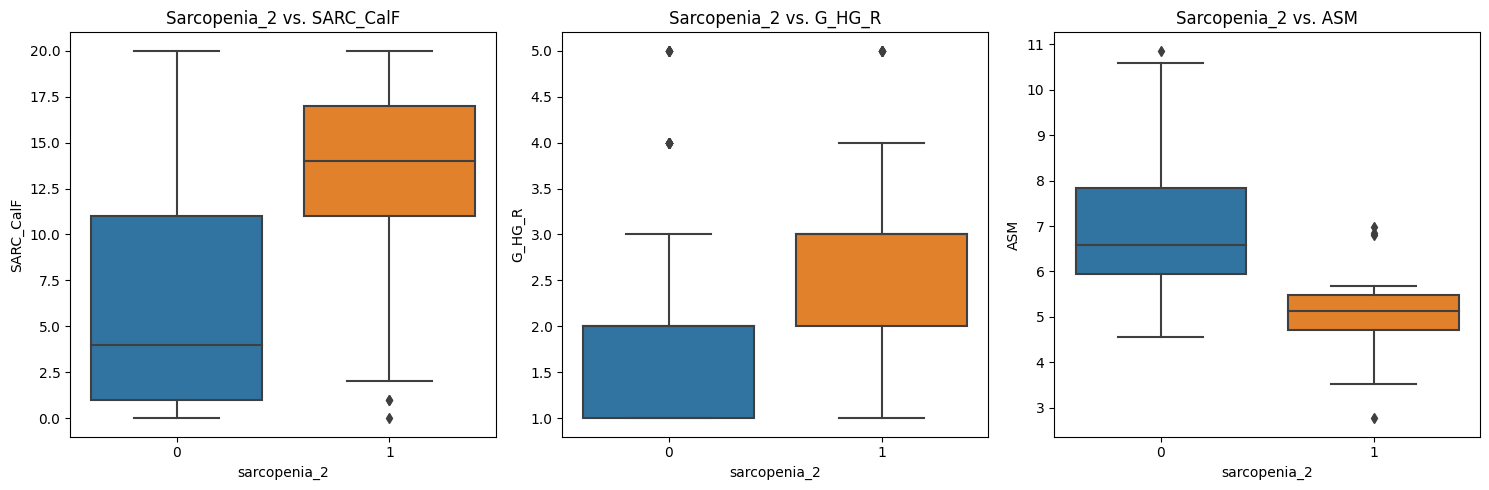

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selected features for visualization
selected_features = ['SARC_CalF', 'G_HG_R', 'ASM']

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=1, ncols=len(selected_features), figsize=(15, 5))

# Plot each of the selected features against the target
for i, feature in enumerate(selected_features):
    sns.boxplot(x='sarcopenia_2', y=feature, data=data, ax=axes[i])
    axes[i].set_title(f'Sarcopenia_2 vs. {feature}')

plt.tight_layout()
plt.show()


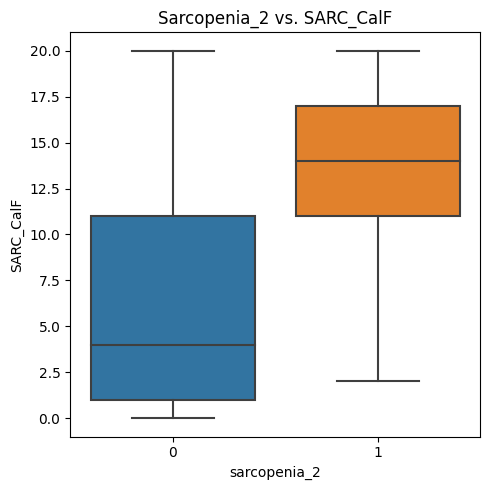

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assume 'data' is your DataFrame and 'SARC_CalF' is one of its columns

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(5, 5))

# Plot without showing outliers
sns.boxplot(x='sarcopenia_2', y='SARC_CalF', data=data, showfliers=False, ax=ax)
ax.set_title('Sarcopenia_2 vs. SARC_CalF')

plt.tight_layout()
plt.show()


In [21]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/kaggle/input/filleddatamice/updated_dataset(97 feature).csv')

# Define a correlation threshold
correlation_threshold = 0.35

# Calculate the correlation with the target variable excluding the target itself from the correlation matrix calculation
target_correlation = data.drop('sarcopenia_2', axis=1).apply(lambda x: x.corr(data['sarcopenia_2']))

# Identify features that meet or exceed the absolute correlation threshold
selected_features_based_on_threshold = target_correlation[abs(target_correlation) > correlation_threshold].index.tolist()

# Include the target variable 'sarcopenia_2' in the list of columns to keep
selected_features_based_on_threshold.append('sarcopenia_2')

# Create a new dataset including only the selected features and the target variable
new_dataset = data[selected_features_based_on_threshold]

# Write the new dataset to a CSV file
new_dataset.to_csv('new_dataset_based_on_selected_features.csv', index=False)

# Optionally print the selected features and check the head of the new dataset
print("Number of selected features (including target):", len(selected_features_based_on_threshold))
print("Selected features based on correlation threshold:")
print(selected_features_based_on_threshold)
print("\nHead of the new dataset based on selected features:")
print(new_dataset.head())


Number of selected features: 22
Selected features based on correlation threshold:
['Age', 'weight_kg', 'SMM_kg', 'BFM_kg', 'BMI_kgm2', 'BMR_kcal', 'CC_cm', 'ASM', 'HG_R_1', 'HG_L_1', 'HG_R_2', 'HG_L_2', 'HG_R_M', 'HG_L_M', 'D_HG', 'ND_HG', 'D_Dorsal', 'SPPB', 'G_HG_R', 'G_HG_L', 'G_BMI', 'SARC_CalF']

Head of the new dataset based on selected features:
   sarcopenia_2  Age  weight_kg  SMM_kg  BFM_kg  BMI_kgm2  BMR_kcal  CC_cm  \
0             0   70      70.00    20.3   34.40     31.53      1195   32.5   
1             0   81      68.40    18.6   33.29     31.90      1128   39.0   
2             0   90      67.09    24.6   21.40     22.20      1356   38.0   
3             0   80      53.90    18.7   18.39     21.30      1135   32.0   
4             0   84      76.90    27.5   26.70     26.60      1455   39.5   

    ASM  HG_R_1  ...  HG_R_M  HG_L_M   D_HG  ND_HG  D_Dorsal  SPPB  G_HG_R  \
0  7.81   11.60  ...   11.60    12.7  12.70   11.6       8.6     8       4   
1  7.31   19.80  ...

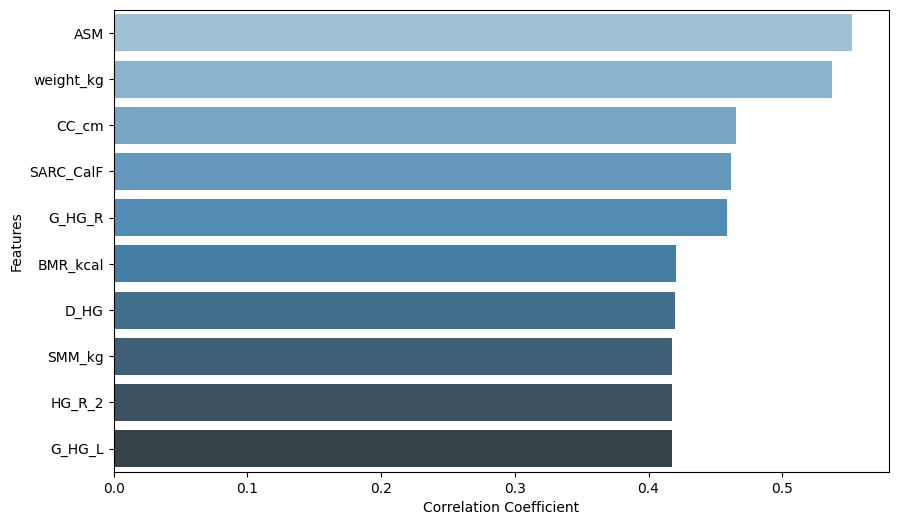

In [6]:
# Select the top 10 features based on absolute correlation value, excluding the target itself
top_10_features = target_correlation.abs().drop('sarcopenia_2').nlargest(10)

# Create a bar chart for the top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_features.values, y=top_10_features.index, palette="Blues_d")
#plt.title('Highly correlated features with Sarcopenia_2')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.savefig('/kaggle/working/plotFeatures.png', dpi=300, bbox_inches='tight')
plt.show()


# SMOTE method

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Load the dataset
file_path = '/kaggle/input/filleddatamice/updated_dataset(97 feature).csv'  # Update this with your file path
data = pd.read_csv(file_path)

# Define features (X) and the target (y)
X = data[['SARC_CalF', 'G_HG_R', 'G_HG_L', 'Age', 'SS_SPPB', 'G_TUG', 'Plartar_R_1', 'D_Plantar', 'PEF', 'ND_Plantar', 
          'Plartar_L_1', 'ND_Dorsal', 'Dorsal_L_1', 'height_cm', 'Dorsal_R_1', 'FEV1', 'D_Dorsal', 'SPPB', 'BFM_kg', 
          'G_BMI', 'BMI_kgm2', 'HG_L_1', 'ND_HG', 'HG_R_1', 'HG_L_M', 'HG_L_2', 'HG_R_M', 'HG_R_2', 'SMM_kg', 'D_HG', 
          'BMR_kcal', 'CC_cm', 'weight_kg', 'ASM']]
y = data['sarcopenia_2']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(y_train.value_counts())
# Apply SMOTE to the training set to address class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# After applying SMOTE, you can check the class distribution to confirm balancing
print(y_train_smote.value_counts())

# Now, you can proceed with your model training and evaluation using the balanced training set
# and your original test set for evaluation.


sarcopenia_2
0    419
1    112
Name: count, dtype: int64
sarcopenia_2
0    419
1    419
Name: count, dtype: int64


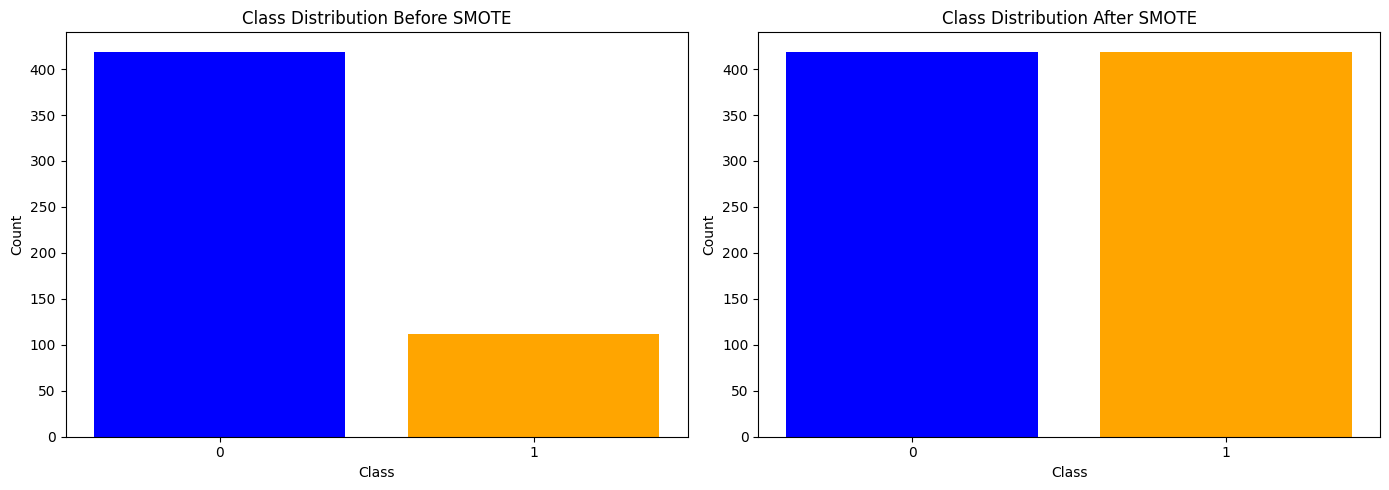

In [8]:
import matplotlib.pyplot as plt

# Class distribution before SMOTE
before_smote_counts = y_train.value_counts()

# Assuming 'y_train_smote' contains the target variable after applying SMOTE
# This part of the code would be executed after applying SMOTE as shown previously
after_smote_counts = y_train_smote.value_counts()

# Setting up the subplot for visualization
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Plotting class distribution before SMOTE
axs[0].bar(before_smote_counts.index.astype(str), before_smote_counts.values, color=['blue', 'orange'])
axs[0].set_title('Class Distribution Before SMOTE')
axs[0].set_xlabel('Class')
axs[0].set_ylabel('Count')

# Plotting class distribution after SMOTE
axs[1].bar(after_smote_counts.index.astype(str), after_smote_counts.values, color=['blue', 'orange'])
axs[1].set_title('Class Distribution After SMOTE')
axs[1].set_xlabel('Class')
axs[1].set_ylabel('Count')

plt.tight_layout()
plt.savefig('/kaggle/working/plotSMOTE.png', dpi=300, bbox_inches='tight')
plt.show()



# Logistic regression

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy on Test Set:  0.9226190476190477

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92        79
           1       0.90      0.96      0.93        89

    accuracy                           0.92       168
   macro avg       0.93      0.92      0.92       168
weighted avg       0.92      0.92      0.92       168



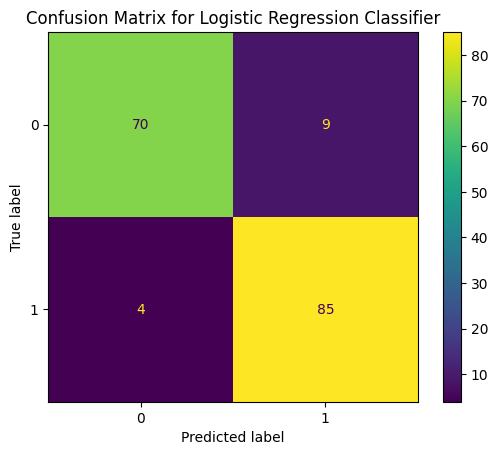

Cross-validation scores: [0.95522388 0.94029851 0.95522388 0.88059701 0.92537313 0.89552239
 0.94029851 0.94029851 0.92537313 0.92537313]
Mean CV accuracy: 0.9283582089552238
[[70  9]
 [ 4 85]]


In [9]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Splitting the balanced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_smote, y_train_smote, test_size=0.2, random_state=42)

# Initialize the Logistic Regression Classifier
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Conduct k-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(logistic_model, X_train, y_train, cv=kf, scoring='accuracy')

# Train the model
logistic_model.fit(X_train, y_train)

# Predictions on the test set
y_pred = logistic_model.predict(X_test)

# Evaluating the model
print("Accuracy on Test Set: ", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


# Plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.savefig('/kaggle/working/LRCM.png')
plt.show()

# Display cross-validation results
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean()}")
print(cm)


# SVR

Accuracy on Test Set:  0.9226190476190477

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92        79
           1       0.90      0.96      0.93        89

    accuracy                           0.92       168
   macro avg       0.93      0.92      0.92       168
weighted avg       0.92      0.92      0.92       168



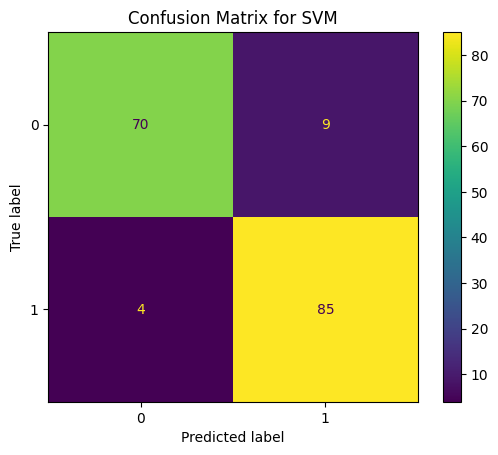

Cross-validation scores: [0.98507463 0.92537313 0.95522388 0.94029851 0.94029851 0.89552239
 0.95522388 0.91044776 0.95522388 0.91044776]
Mean CV accuracy: 0.9373134328358208


In [10]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming X_train, y_train, X_test, y_test are already defined
# If not, they should be defined similar to previous steps:
# X = df.drop('sarcopenia_2', axis=1)
# y = df['sarcopenia_2']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM Classifier
svm_model = SVC(kernel='linear', random_state=42)

# Conduct k-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(svm_model, X_train, y_train, cv=kf, scoring='accuracy')

# Train the model
svm_model.fit(X_train, y_train)

# Predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluating the model
print("Accuracy on Test Set: ", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix for SVM')
plt.savefig('/kaggle/working/SVMCM.png')
plt.show()

# Display cross-validation results
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean()}")


# Gradient Boosting

Accuracy on Test Set:  0.9702380952380952

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        79
           1       0.95      1.00      0.97        89

    accuracy                           0.97       168
   macro avg       0.97      0.97      0.97       168
weighted avg       0.97      0.97      0.97       168



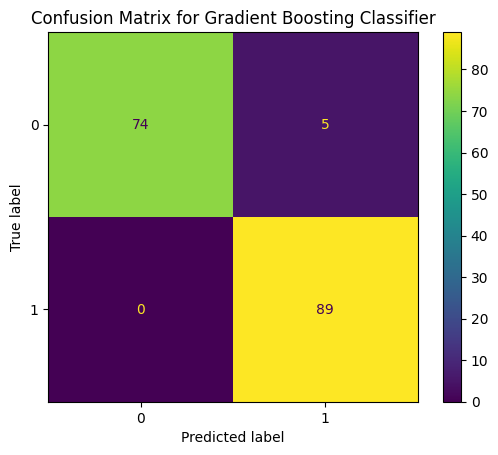

Cross-validation scores: [1.         1.         0.98507463 0.95522388 0.97014925 0.97014925
 0.97014925 1.         0.98507463 0.95522388]
Mean CV accuracy: 0.9791044776119403


In [11]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)

# Conduct k-fold cross-validation with 10 folds
kf_10 = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores_gb = cross_val_score(gb_model, X_train, y_train, cv=kf_10, scoring='accuracy')

# Train the model
gb_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluating the model
print("Accuracy on Test Set: ", accuracy_score(y_test, y_pred_gb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))

# Plotting the confusion matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)
disp_gb = ConfusionMatrixDisplay(confusion_matrix=cm_gb)
disp_gb.plot()
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.savefig('/kaggle/working/GBCM.png')
plt.show()

# Display cross-validation results
print(f"Cross-validation scores: {cv_scores_gb}")
print(f"Mean CV accuracy: {cv_scores_gb.mean()}")


# DT model

Accuracy on Test Set:  0.9523809523809523

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.92      0.95        79
           1       0.94      0.98      0.96        89

    accuracy                           0.95       168
   macro avg       0.95      0.95      0.95       168
weighted avg       0.95      0.95      0.95       168



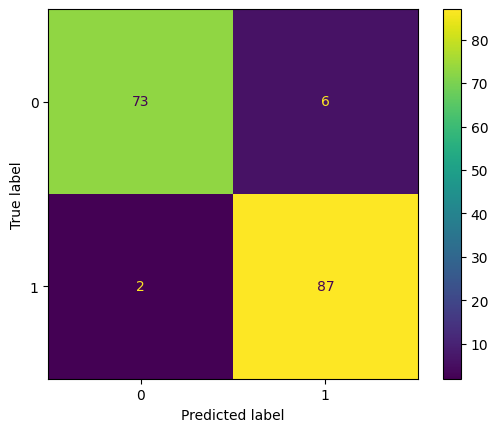

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Assuming X_train_smote and y_train_smote are already defined and represent your balanced dataset

# Splitting the balanced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_smote, y_train_smote, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluating the model
print("Accuracy on Test Set: ", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


# LightGBM model

[LightGBM] [Info] Number of positive: 330, number of negative: 340
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003578 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6054
[LightGBM] [Info] Number of data points in the train set: 670, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492537 -> initscore=-0.029853
[LightGBM] [Info] Start training from score -0.029853
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

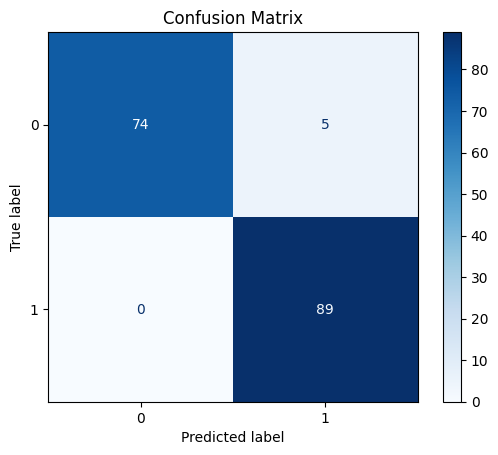

In [13]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score

# Assuming X_train_smote and y_train_smote are already defined and represent your balanced dataset

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_smote, y_train_smote, test_size=0.2, random_state=42)

# Initialize the LightGBM Classifier
lgbm_classifier = LGBMClassifier(random_state=42)

# Train the model
lgbm_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = lgbm_classifier.predict(X_test)

# Evaluating the model
print("Accuracy on Test Set: ", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)  # You can change the color map by altering the cmap parameter
plt.title('Confusion Matrix')
plt.show()


# CatBoost model

Accuracy on Test Set:  0.9761904761904762

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97        79
           1       0.96      1.00      0.98        89

    accuracy                           0.98       168
   macro avg       0.98      0.97      0.98       168
weighted avg       0.98      0.98      0.98       168



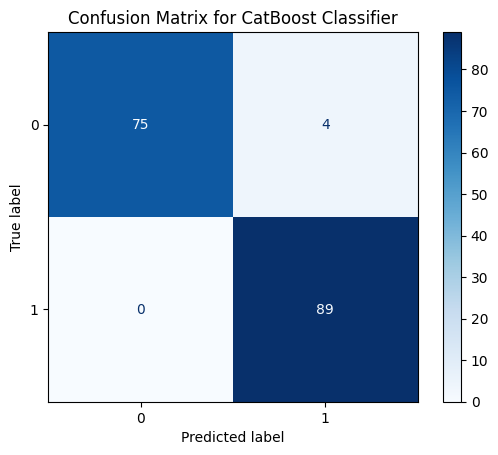

In [14]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, accuracy_score

# Assuming X_train_smote and y_train_smote are already defined and represent your balanced dataset

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_smote, y_train_smote, test_size=0.2, random_state=42)

# Initialize the CatBoost Classifier
# Note: CatBoost outputs training logs by default, which can be disabled by setting verbose=0
catboost_classifier = CatBoostClassifier(random_state=42, verbose=0)

# Train the model
catboost_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = catboost_classifier.predict(X_test)

# Evaluating the model
print("Accuracy on Test Set: ", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)  # You can change the color map by altering the cmap parameter
plt.title('Confusion Matrix for CatBoost Classifier')
plt.show()


# Random forest

Accuracy on Test Set:  0.9702380952380952

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        79
           1       0.95      1.00      0.97        89

    accuracy                           0.97       168
   macro avg       0.97      0.97      0.97       168
weighted avg       0.97      0.97      0.97       168



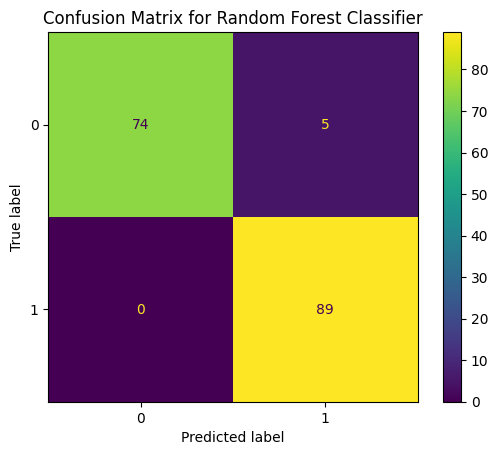

Cross-validation scores: [1.         0.95522388 1.         0.98507463 0.97014925 0.94029851
 0.98507463 0.98507463 0.97014925 0.95522388]
Mean CV accuracy: 0.9746268656716417


In [15]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Conduct k-fold cross-validation with 10 folds
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=kf_10, scoring='accuracy')

# Train the model
rf_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluating the model
print("Accuracy on Test Set: ", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Plotting the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot()
plt.title('Confusion Matrix for Random Forest Classifier')
plt.savefig('/kaggle/working/RFCM.png')
plt.show()

# Display cross-validation results
print(f"Cross-validation scores: {cv_scores_rf}")
print(f"Mean CV accuracy: {cv_scores_rf.mean()}")




In [16]:
import pandas as pd

# Load the dataset
file_path = '/kaggle/input/misseddatasarcopenia/cleaned_dataset(Current97).csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Check for missing values
missing_values = data.isnull().sum()
missing_values_percentage = (missing_values / len(data)) * 100

# Create a summary DataFrame
missingness_summary = pd.DataFrame({'Missing Values': missing_values, 
                                    'Percentage of Total': missing_values_percentage})

# Display columns with missing values
missing_columns = missingness_summary[missingness_summary['Missing Values'] > 0]
print(missing_columns)
print(missing_values_percentage)

                Missing Values  Percentage of Total
SMM_kg                      21             3.162651
BFM_kg                      21             3.162651
Percent_BF                  21             3.162651
BMR_kcal                    20             3.012048
SBP_mmHg                   154            23.192771
...                        ...                  ...
HbA1c                      177            26.656627
DM                         183            27.560241
Hypertension               180            27.108434
Hyperlipidemia             180            27.108434
Sleepdisorder              181            27.259036

[79 rows x 2 columns]
sarcopenia_2       0.000000
Place              0.000000
sex                0.000000
Age                0.000000
height_cm          0.000000
                    ...    
HbA1c             26.656627
DM                27.560241
Hypertension      27.108434
Hyperlipidemia    27.108434
Sleepdisorder     27.259036
Length: 97, dtype: float64
